In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [23]:
df = pd.read_csv('Social_Network_Ads.csv')

In [24]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
df.drop('User ID', axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [26]:
     gender= pd.get_dummies(df['Gender'], drop_first=True)

In [27]:
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [28]:
df = pd.concat([df,gender],axis=1)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [29]:
df.drop(['Gender', 'User ID'], axis=1, inplace=True)

In [30]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [31]:
df.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


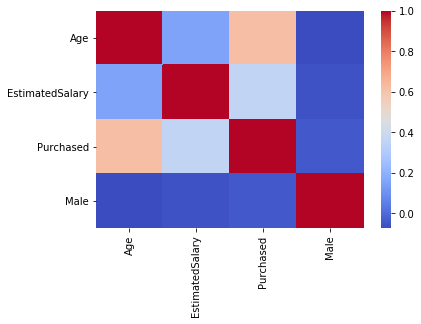

In [33]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [34]:
df.drop('Male', axis = 1, inplace=True)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss = StandardScaler()

In [37]:
standard_array = ss.fit_transform(df.drop('Purchased', axis=1))

In [46]:
X = pd.DataFrame(data =standard_array, columns=df.columns[:-1], index=df.index )

In [47]:
X

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
5,-1.017692,-0.344817
6,-1.017692,0.418669
7,-0.540127,2.356750
8,-1.208719,-1.078938
9,-0.253587,-0.139263


In [39]:
Y = df['Purchased']

In [40]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)

In [60]:
x_train.shape

(280, 2)

In [61]:
x_test.shape

(120, 2)

In [62]:
y_train.shape

(280,)

In [63]:
y_test.shape

(120,)

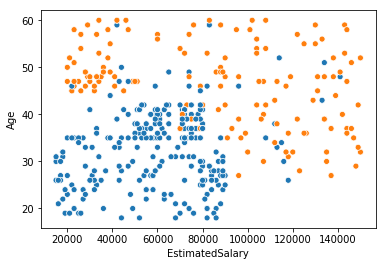

In [70]:
sns.scatterplot(y = 'Age', x= 'EstimatedSalary', data = df, hue = 'Purchased', legend=False)

In [71]:
from sklearn.svm import SVC

In [72]:
classifier = SVC()

In [73]:
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
y_pred = classifier.predict(x_test)

In [76]:
len(y_pred)

120

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
cc = confusion_matrix(y_test,y_pred)

In [80]:
cc

array([[80,  4],
       [ 3, 33]], dtype=int64)

In [82]:
113/120

0.9416666666666667

In [83]:
y_test.value_counts()

0    84
1    36
Name: Purchased, dtype: int64

In [87]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96        84
          1       0.89      0.92      0.90        36

avg / total       0.94      0.94      0.94       120

